## Laboratorio No. 10 
----
### Análisis Exploratorio de Datos y Modelado con ChatGPT
- Paola de León 20361
- Gabriela Contreras 20213

In [1]:
import pyreadstat
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

### Parte No.1

*Carga y limpieza de datos*

In [2]:
# Abrir archivo 
df1 = pd.read_spss('ENCOVI_Hogar.sav')

#Ver archivo
print("First data set")
print(df1.head())

First data set
             REGION      DEPTO    AREA  UPM  NUMHOG  FACTOR  FACTOR3  \
0  I. METROPOLITANA  Guatemala  Urbana  1.0     1.0   525.0   1575.0   
1  I. METROPOLITANA  Guatemala  Urbana  1.0     2.0   525.0   1575.0   
2  I. METROPOLITANA  Guatemala  Urbana  1.0     3.0   525.0   9450.0   
3  I. METROPOLITANA  Guatemala  Urbana  1.0     4.0   525.0   3150.0   
4  I. METROPOLITANA  Guatemala  Urbana  1.0     5.0   525.0   1575.0   

          POBREZA  THOGAR PPB01  ...  P01H10  P01H11  P01H12 P01H13  P01H14  \
0        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   
1        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   
2  Pobre no extr.    18.0    NO  ...      Si      Si      Si     Si      Si   
3  Pobre no extr.     6.0    NO  ...      No      No      No     No      No   
4        No pobre     3.0    NO  ...     NaN     NaN     NaN    NaN     NaN   

   P01H15  P01H16 DIA_ENC MES_ENC   A_ENC  
0     NaN     NaN    22.0  AGOSTO

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Columns: 163 entries, REGION to A_ENC
dtypes: category(89), float64(65), object(9)
memory usage: 7.5+ MB


In [4]:
# ver si exiten datos null
print(df1.isnull().sum())

REGION        0
DEPTO         0
AREA          0
UPM           0
NUMHOG        0
           ... 
P01H15     2641
P01H16     2641
DIA_ENC       0
MES_ENC       1
A_ENC         1
Length: 163, dtype: int64


In [5]:
# Normalizar nombres de columnas 
dic_H = {
    "REGION":"Region",
    "DEPTO":"Depto",
    "AREA":"Area",
    "POBREZA":"Pobreza",
    "THOGAR":"Tamano_hogar",
    "PPB01":"Cocinan",
    "PPB02": "No.Hogares",
    "PPB04":"No.habitantes",
    "P01A02": "Material_exterior",
    "P01A03":"Material_techo",
    "P01A04":"Material_piso",
    "P01A05D":"Servicio_telefono",
    "P01A05E":"Agua",
    "P01A05F":"Electricidad",
    "P01D21": "Extraccion_Basura",
    "MES_ENC":"Mes_enc",
    "A_ENC": "Year_enc"    
}

df1_col_to_Use = ['REGION', 'DEPTO', 'AREA', 'POBREZA', 'THOGAR','PPB01','PPB02','PPB04','P01A02','P01A03','P01A04','P01A05D','P01A05E','P01A05F','P01D21','A_ENC','MES_ENC']
df1= df1[df1_col_to_Use]

df1_nuevo = df1.rename(columns=dic_H)

In [6]:
# Abrir segundo archivo 
df2 = pd.read_spss('ENCOVI_Personas.sav')

#Show files
print(df2.head())

             REGION      DEPTO    AREA  UPM  NUMHOG  FACTOR   POBREZA  THOGAR  \
0  I. METROPOLITANA  Guatemala  Urbana  1.0     1.0   525.0  No pobre     3.0   
1  I. METROPOLITANA  Guatemala  Urbana  1.0     1.0   525.0  No pobre     3.0   
2  I. METROPOLITANA  Guatemala  Urbana  1.0     1.0   525.0  No pobre     3.0   
3  I. METROPOLITANA  Guatemala  Urbana  1.0     2.0   525.0  No pobre     3.0   
4  I. METROPOLITANA  Guatemala  Urbana  1.0     2.0   525.0  No pobre     3.0   

    ID   PPA02  ...  P11A10A  P11A10B P11B01A  P11B01B P11B02A P11B02B  \
0  1.0  HOMBRE  ...       NO      NaN      NO      NaN      NO     NaN   
1  2.0   MUJER  ...       NO      NaN      NO      NaN      NO     NaN   
2  3.0   MUJER  ...       NO      NaN      NO      NaN      NO     NaN   
3  1.0   MUJER  ...       NO      NaN      NO      NaN      NO     NaN   
4  2.0  HOMBRE  ...       NO      NaN      NO      NaN      NO     NaN   

  P11B03A P11B03B P11B04A P11B04B  
0      NO     NaN      NO     Na

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54822 entries, 0 to 54821
Columns: 465 entries, REGION to P11B04B
dtypes: category(258), float64(197), object(10)
memory usage: 100.2+ MB


In [8]:
df2.isnull().sum()

REGION         0
DEPTO          0
AREA           0
UPM            0
NUMHOG         0
           ...  
P11B02B    54247
P11B03A     8999
P11B03B    54612
P11B04A     9001
P11B04B    54549
Length: 465, dtype: int64

In [9]:
# Normalizar nombres de columnas 
dic_P = {
    "REGION":"Region",
    "DEPTO":"Depto",
    "AREA":"Area",
    "POBREZA":"Pobreza",
    "THOGAR":"Tamano_hogar",
    "PPA02":"Sexo",
    "PPA03":"Edad",
    "PPA06": "Estado_civil",  
}

df2_col_to_Use = ['REGION', 'DEPTO', 'AREA', 'POBREZA', 'THOGAR','PPA02','PPA03','PPA06']
df2= df2[df2_col_to_Use]

df2_nuevo = df2.rename(columns=dic_P)

*Analisis Univariable* 

In [10]:
#Estadisticas Descriptivas
df1_nuevo.describe()

,Tamano_hogar,No.Hogares,No.habitantes,Year_enc
count,11536.000000,11536.000000,11536.000000,11535.000000
mean,4.752254,1.008929,4.752254,2014.107065
std,2.355452,0.105374,2.355452,0.309210
min,1.000000,1.000000,1.000000,2014.000000
25%,3.000000,1.000000,3.000000,2014.000000
50%,4.000000,1.000000,4.000000,2014.000000
75%,6.000000,1.000000,6.000000,2014.000000
max,20.000000,3.000000,20.000000,2015.000000


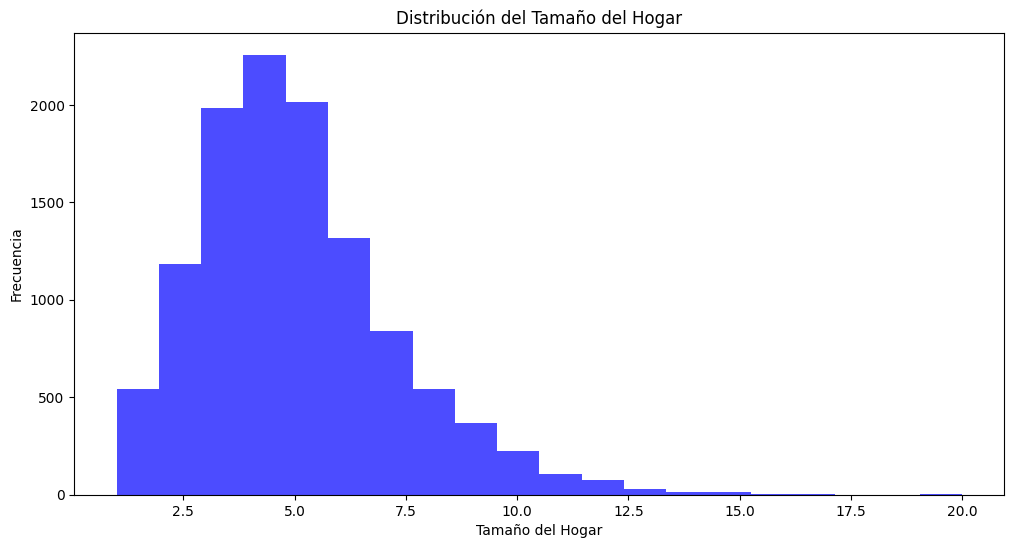

In [11]:
# Histograma para Tamano_hogar
plt.figure(figsize=(12, 6))
plt.hist(df1_nuevo['Tamano_hogar'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución del Tamaño del Hogar')
plt.xlabel('Tamaño del Hogar')
plt.ylabel('Frecuencia')
plt.show()


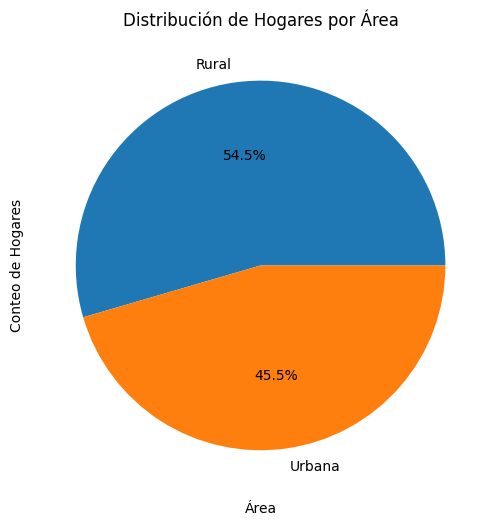

In [12]:
# Conteo de valores de la variable Area
counts = df1_nuevo['Area'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
#sns.countplot(x=df1_nuevo['Area'], palette='viridis')
plt.title('Distribución de Hogares por Área')
plt.xlabel('Área')
plt.ylabel('Conteo de Hogares')
plt.show()


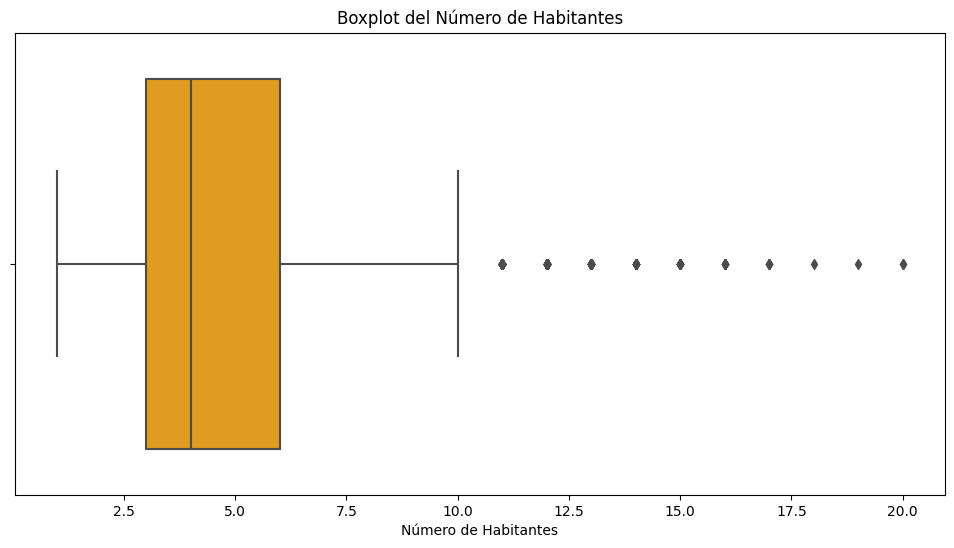

In [13]:
# Boxplot para No.habitantes
plt.figure(figsize=(12, 6))
sns.boxplot(x=df1_nuevo['No.habitantes'], color='orange')
plt.title('Boxplot del Número de Habitantes')
plt.xlabel('Número de Habitantes')
plt.show()

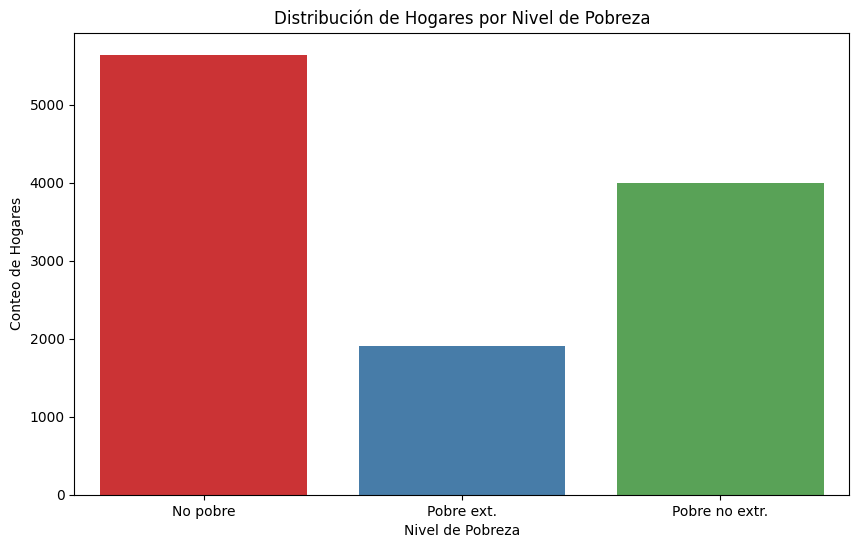

In [14]:
# Gráfico la Pobreza
# Conteo de valores de la variable Pobreza
pobreza_counts = df1_nuevo['Pobreza'].value_counts()


plt.figure(figsize=(10, 6))
# plt.pie(pobreza_counts, labels=pobreza_counts.index, autopct='%1.1f%%', colors=['orange', 'skyblue', 'green'])
sns.countplot(x=df1_nuevo['Pobreza'], palette='Set1')
plt.title('Distribución de Hogares por Nivel de Pobreza')
plt.xlabel('Nivel de Pobreza')
plt.ylabel('Conteo de Hogares')
plt.show()

In [15]:
df2_nuevo.describe()

,Tamano_hogar,Edad
count,54822.000000,54819.000000
mean,5.919631,25.629690
std,2.638153,19.798768
min,1.000000,0.000000
25%,4.000000,10.000000
50%,5.000000,20.000000
75%,7.000000,38.000000
max,20.000000,97.000000


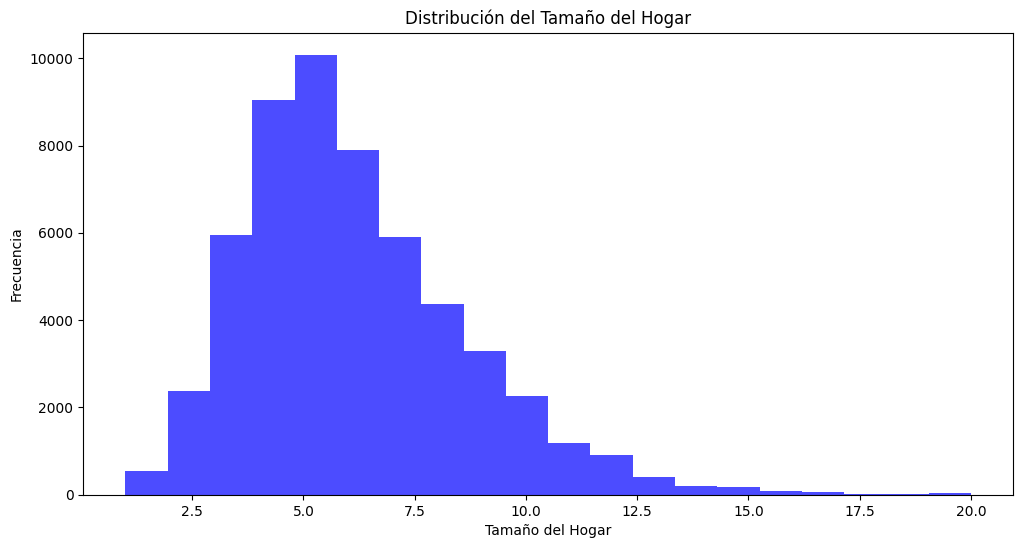

In [16]:
# Histograma para Tamano_hogar
plt.figure(figsize=(12, 6))
plt.hist(df2_nuevo['Tamano_hogar'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución del Tamaño del Hogar')
plt.xlabel('Tamaño del Hogar')
plt.ylabel('Frecuencia')
plt.show()

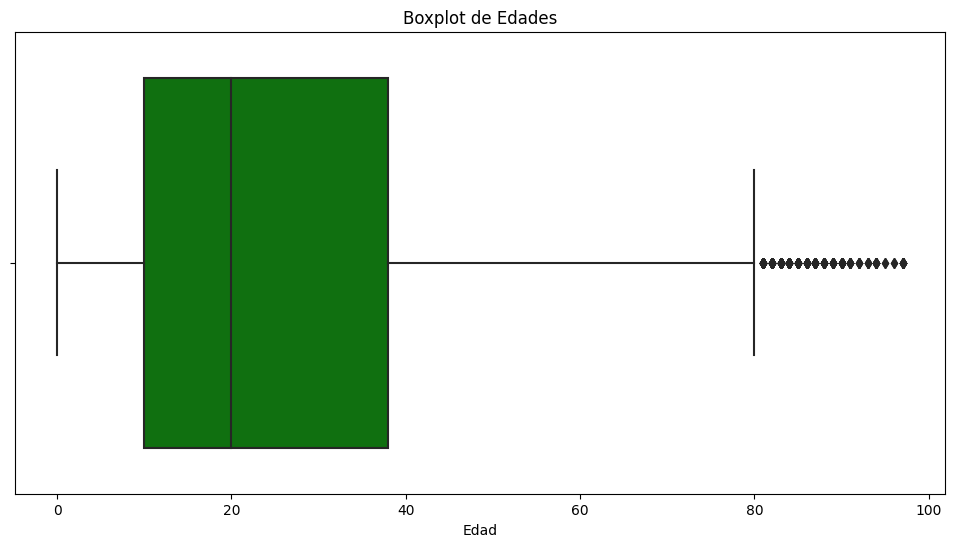

In [17]:
# Boxplot para Edad
plt.figure(figsize=(12, 6))
sns.boxplot(x=df2_nuevo['Edad'], color='green')
plt.title('Boxplot de Edades')
plt.xlabel('Edad')
plt.show()

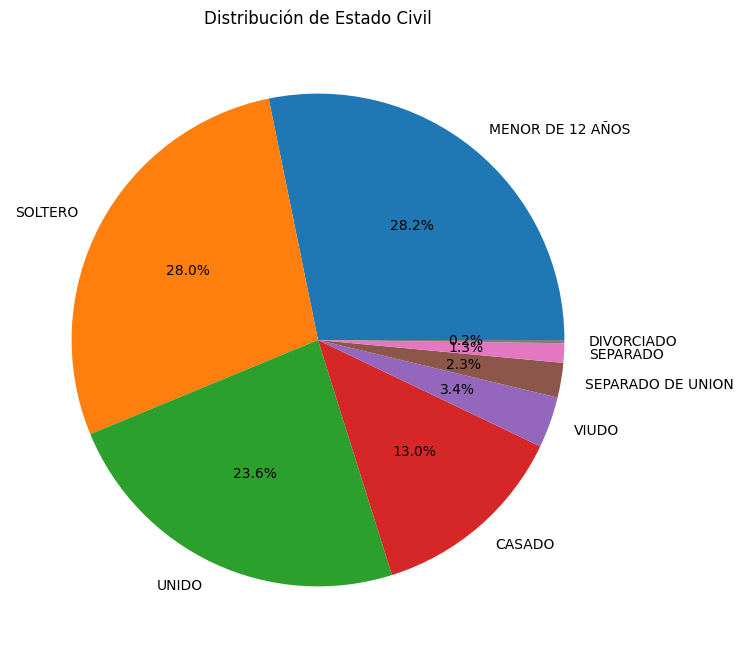

In [18]:
# Conteo de valores de la variable Estado Civil
estado_civil_counts = df2_nuevo['Estado_civil'].value_counts()

# Crear el gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(estado_civil_counts, labels=estado_civil_counts.index, autopct='%1.1f%%')
plt.title('Distribución de Estado Civil')
plt.show()


*Analisis Bivariable*

In [19]:
# Convertir las columnas a float
categorical_columns = ['Region', 'Depto', 'Area', 'Pobreza', 'Cocinan', 'Material_exterior', 'Material_techo', 'Material_piso', 'Servicio_telefono', 'Agua', 'Electricidad', 'Extraccion_Basura', 'Mes_enc']
df1_nuevo_corr = df1_nuevo.copy()
df1_nuevo_corr[categorical_columns] = df1_nuevo[categorical_columns].apply(lambda x: x.cat.codes.astype('float64'))

# Verificar el resultado
print(df1_nuevo_corr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             11536 non-null  float64
 1   Depto              11536 non-null  float64
 2   Area               11536 non-null  float64
 3   Pobreza            11536 non-null  float64
 4   Tamano_hogar       11536 non-null  float64
 5   Cocinan            11536 non-null  float64
 6   No.Hogares         11536 non-null  float64
 7   No.habitantes      11536 non-null  float64
 8   Material_exterior  11536 non-null  float64
 9   Material_techo     11536 non-null  float64
 10  Material_piso      11536 non-null  float64
 11  Servicio_telefono  11536 non-null  float64
 12  Agua               11536 non-null  float64
 13  Electricidad       11536 non-null  float64
 14  Extraccion_Basura  11536 non-null  float64
 15  Year_enc           11535 non-null  float64
 16  Mes_enc            115

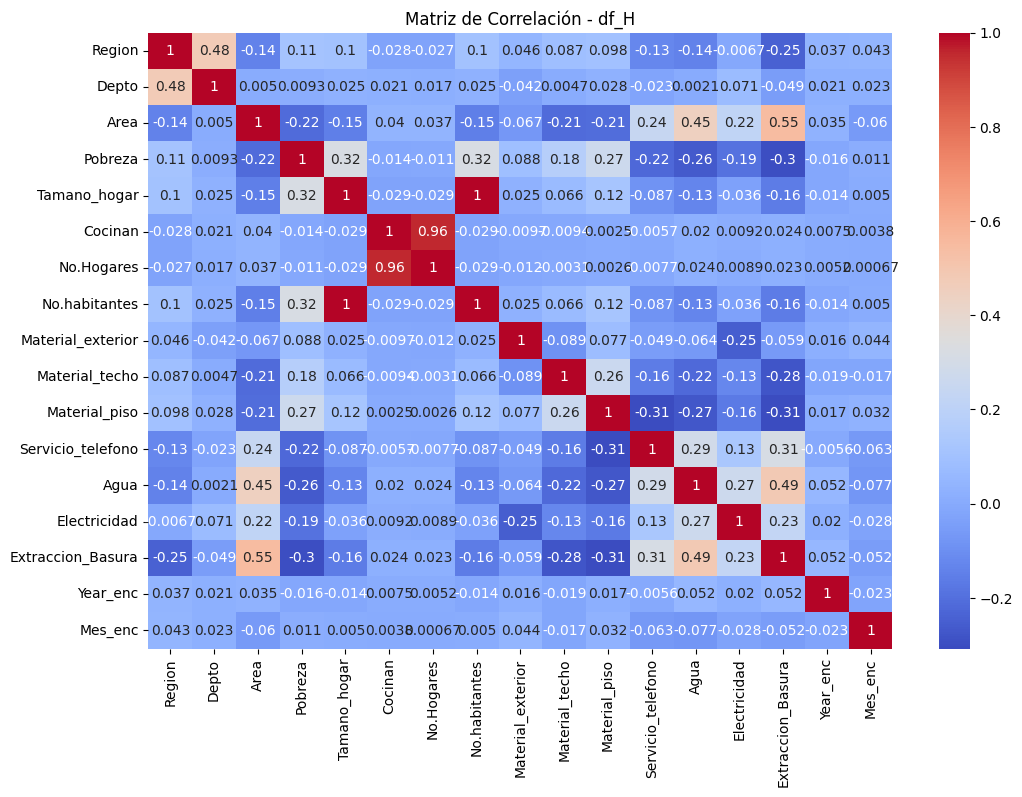

In [20]:
#Mapa de correlacion 
corrH = df1_nuevo_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corrH, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - df_H')
plt.show()

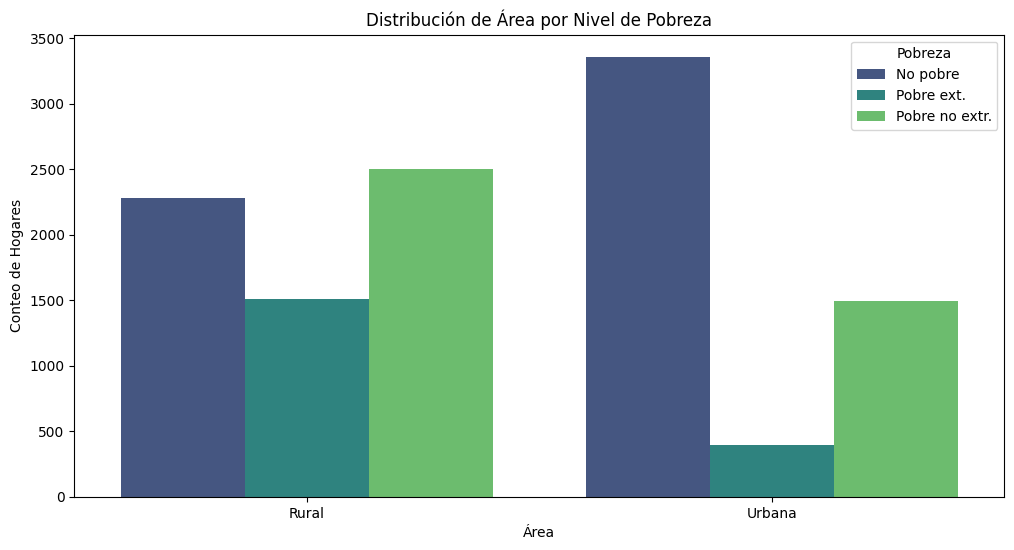

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df1_nuevo['Area'], hue=df1_nuevo['Pobreza'], palette='viridis')
plt.title('Distribución de Área por Nivel de Pobreza')
plt.xlabel('Área')
plt.ylabel('Conteo de Hogares')
plt.show()

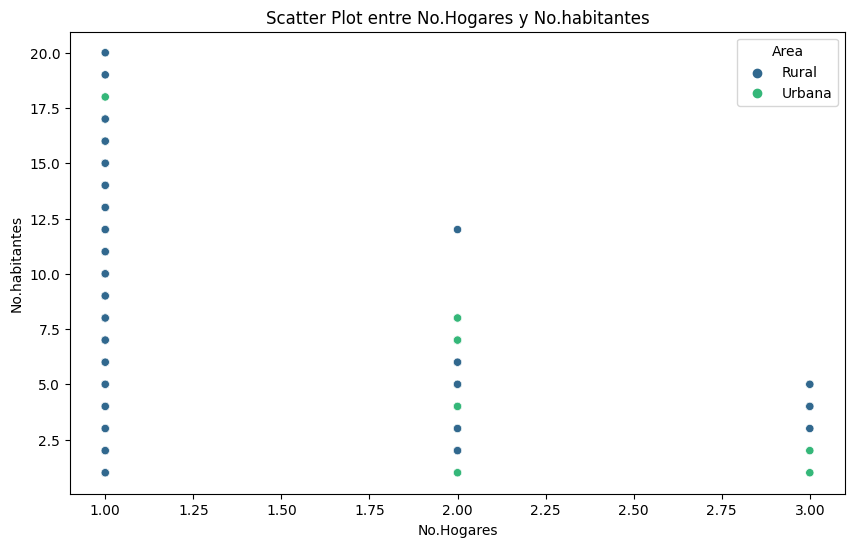

In [22]:
# Scatter plot para 'No.Hogares' y 'No.habitantes'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1_nuevo['No.Hogares'], y=df1_nuevo['No.habitantes'], hue=df1_nuevo['Area'], palette='viridis')
plt.title('Scatter Plot entre No.Hogares y No.habitantes')
plt.xlabel('No.Hogares')
plt.ylabel('No.habitantes')
plt.show()

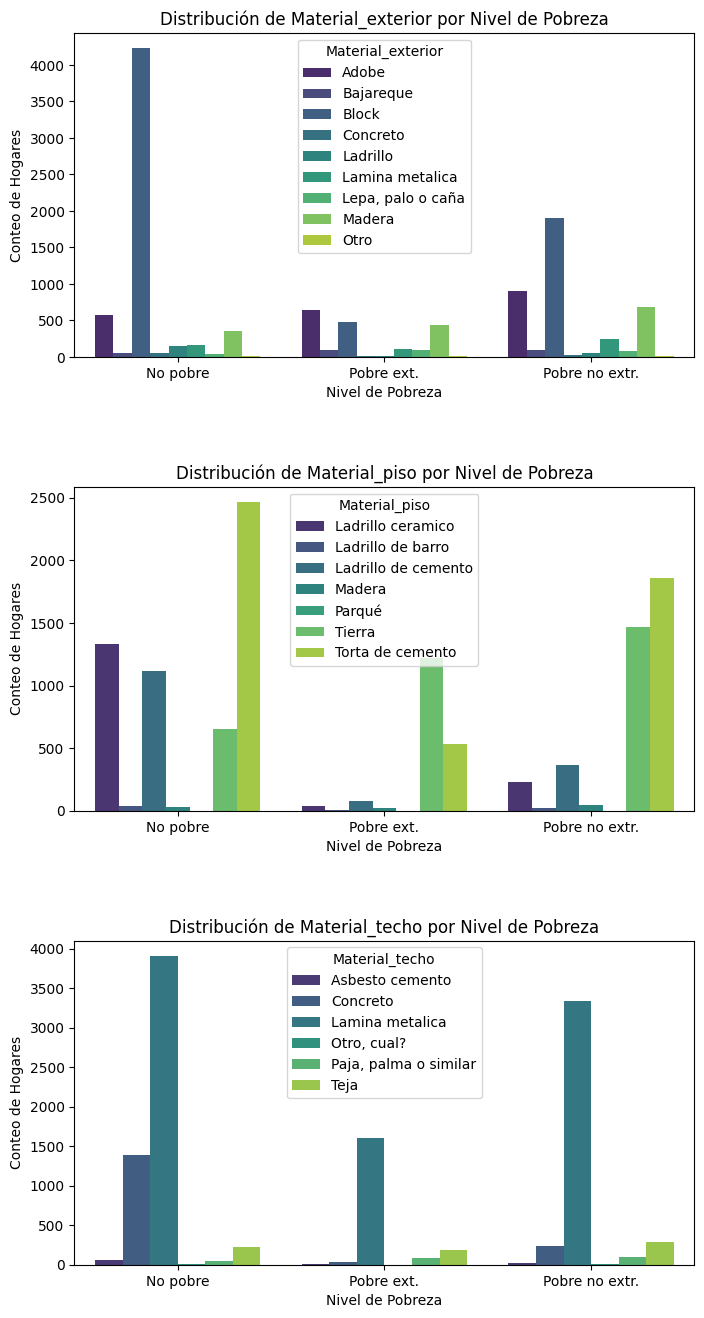

In [23]:
# Seleccionar las variables relevantes
selected_variables = ['Material_exterior', 'Material_piso', 'Material_techo', 'Pobreza']

# Crear un DataFrame con las variables seleccionadas
selected_data = df1_nuevo[selected_variables]

# Configurar el tamaño de la figura y el diseño de los subgráficos
plt.figure(figsize=(8, 16))
plt.subplots_adjust(hspace=0.4)

# Iterar sobre las tres variables de material y crear un gráfico de barras agrupadas para cada una
for i, material in enumerate(['Material_exterior', 'Material_piso', 'Material_techo'], 1):
    plt.subplot(3, 1, i)  # Cambiado a 3 filas, 1 columna
    sns.countplot(data=selected_data, x='Pobreza', hue=material, palette='viridis',
                  order=['No pobre', 'Pobre ext.', 'Pobre no extr.'])
    plt.title(f'Distribución de {material} por Nivel de Pobreza')
    plt.xlabel('Nivel de Pobreza')
    plt.ylabel('Conteo de Hogares')
    plt.legend(title=material)

# Mostrar los gráficos
plt.show()


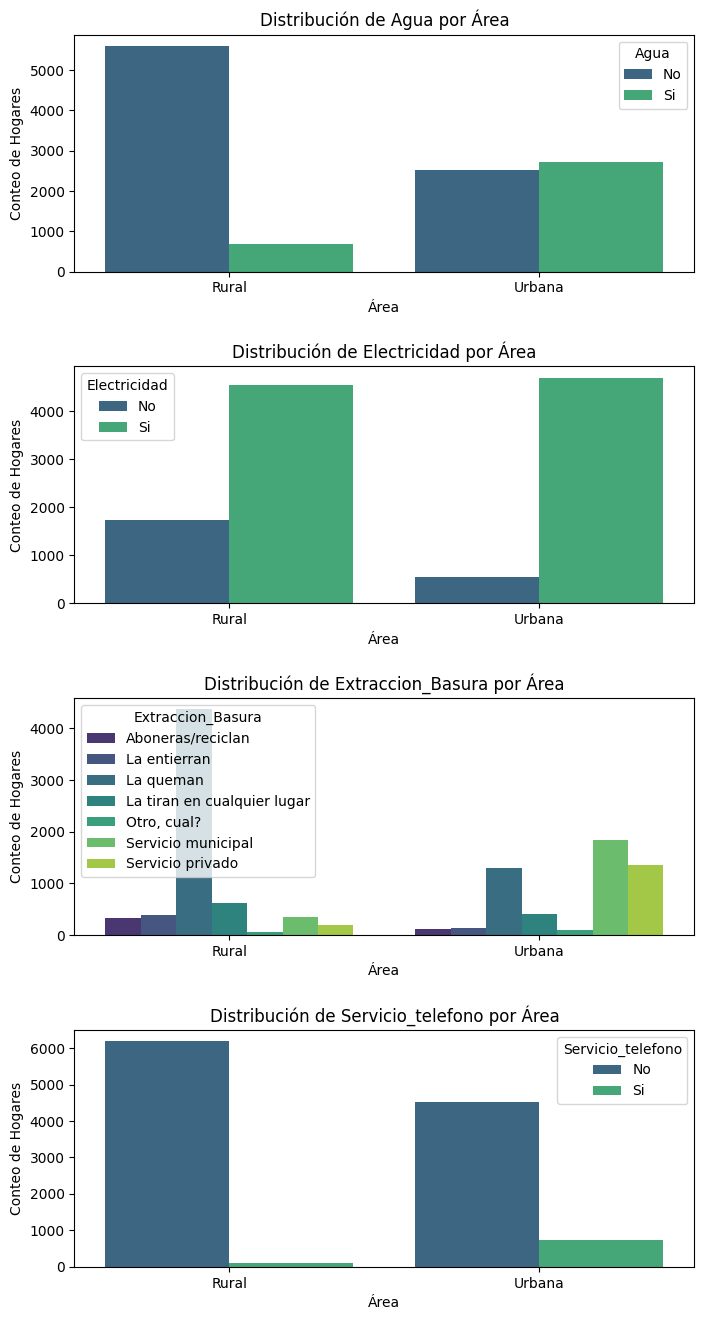

In [24]:
# Seleccionar las variables relevantes
selected_variables = ['Agua', 'Electricidad', 'Extraccion_Basura', 'Servicio_telefono', 'Area']

# Crear un DataFrame con las variables seleccionadas
selected_data = df1_nuevo[selected_variables]

# Configurar el tamaño de la figura y el diseño de los subgráficos
plt.figure(figsize=(8, 16))
plt.subplots_adjust(hspace=0.4)


# Iterar sobre las variables de servicios y crear un gráfico de barras agrupadas para cada una
for i, servicio in enumerate(['Agua', 'Electricidad', 'Extraccion_Basura', 'Servicio_telefono'], 1):
    plt.subplot(4, 1, i)
    sns.countplot(data=selected_data, x='Area', hue=servicio, palette='viridis')
    plt.title(f'Distribución de {servicio} por Área')
    plt.xlabel('Área')
    plt.ylabel('Conteo de Hogares')
    plt.legend(title=servicio)

# Mostrar los gráficos
plt.show()

In [25]:
#Mapa de correlacion 
# Convertir las columnas a float
categorical_columns = ['Region', 'Depto', 'Area', 'Pobreza', 'Sexo', 'Estado_civil']

df2_nuevo_corr = df2_nuevo.copy()
df2_nuevo_corr[categorical_columns] = df2_nuevo[categorical_columns].apply(lambda x: x.cat.codes.astype('float64'))

# Verificar el resultado
print(df2_nuevo_corr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54822 entries, 0 to 54821
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        54822 non-null  float64
 1   Depto         54822 non-null  float64
 2   Area          54822 non-null  float64
 3   Pobreza       54822 non-null  float64
 4   Tamano_hogar  54822 non-null  float64
 5   Sexo          54822 non-null  float64
 6   Edad          54819 non-null  float64
 7   Estado_civil  54822 non-null  float64
dtypes: float64(8)
memory usage: 3.3 MB
None


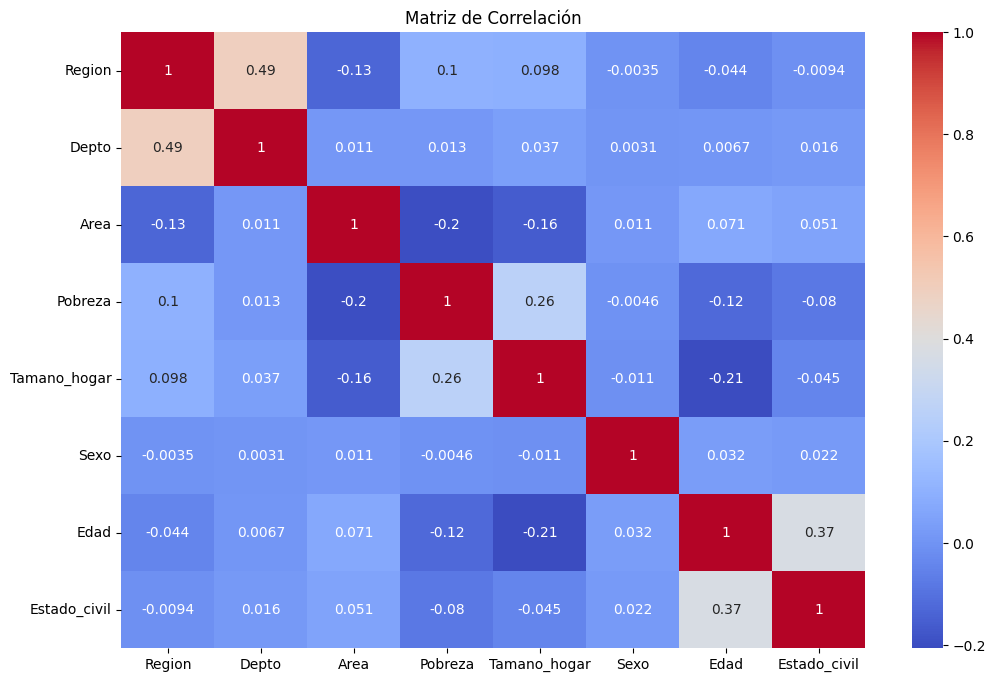

In [26]:
#Mapa de correlacion 
corrP = df2_nuevo_corr.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corrP, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

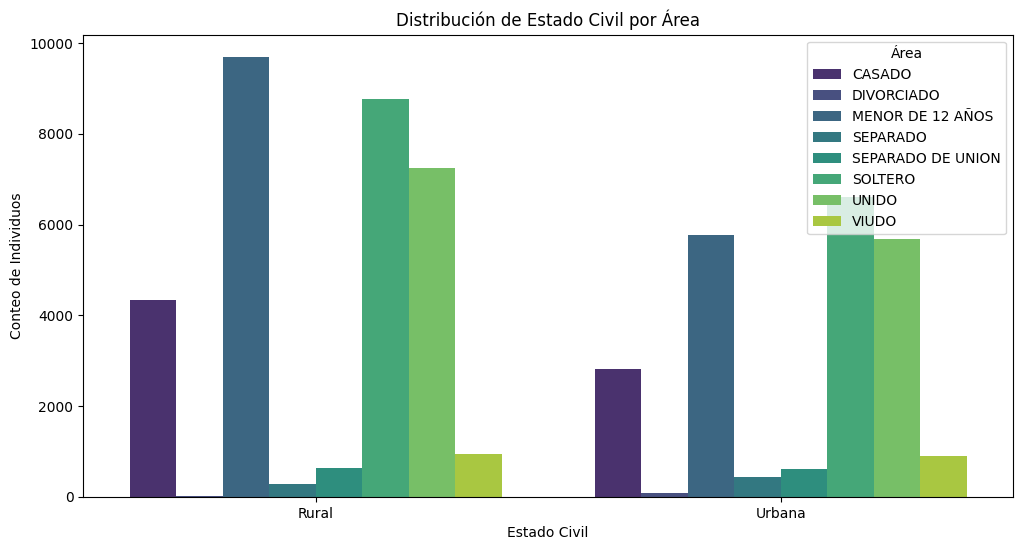

In [27]:
# Gráfico de barras para Estado Civil por Área
plt.figure(figsize=(12, 6))
sns.countplot(x='Area', hue='Estado_civil', data=df2_nuevo, palette='viridis')
plt.title('Distribución de Estado Civil por Área')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo de Individuos')
plt.legend(title='Área')
plt.show()


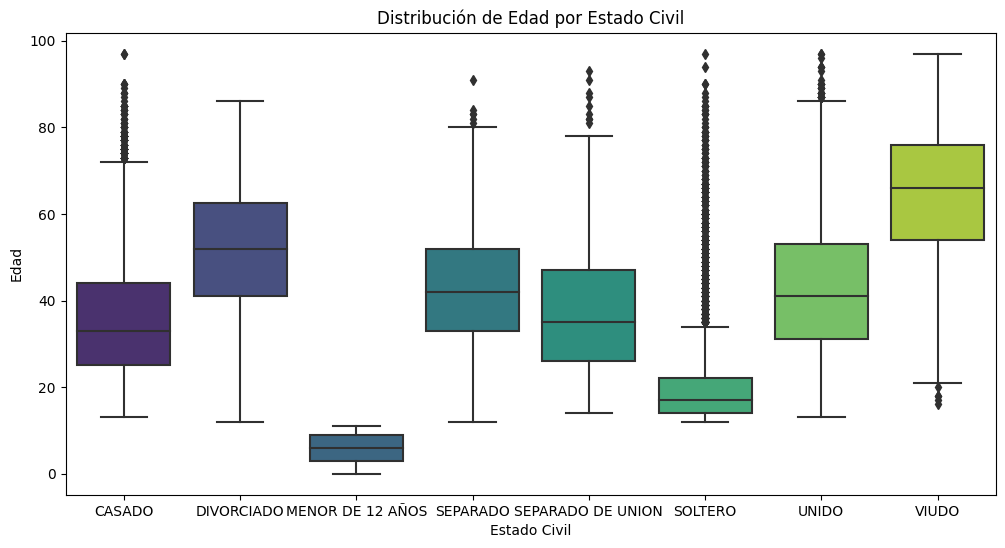

In [28]:
# Boxplot para Edad por Estado Civil
plt.figure(figsize=(12, 6))
sns.boxplot(x='Estado_civil', y='Edad', data=df2_nuevo, palette='viridis')
plt.title('Distribución de Edad por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Edad')
plt.show()


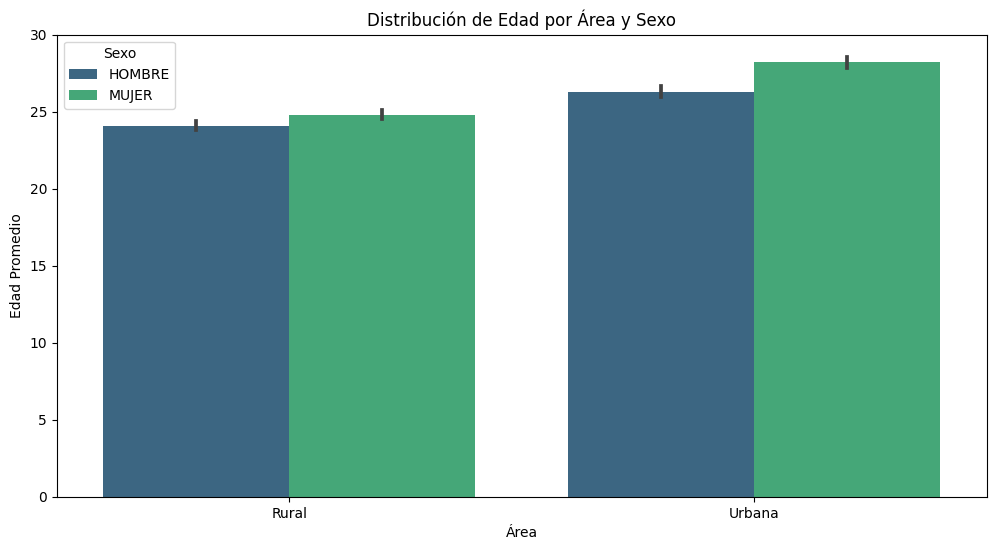

In [29]:
# Gráfico de barras apiladas para Edad por Área y Sexo
plt.figure(figsize=(12, 6))
sns.barplot(x='Area', y='Edad', hue='Sexo', data=df2_nuevo, palette='viridis')
plt.title('Distribución de Edad por Área y Sexo')
plt.xlabel('Área')
plt.ylabel('Edad Promedio')
plt.legend(title='Sexo')
plt.show()


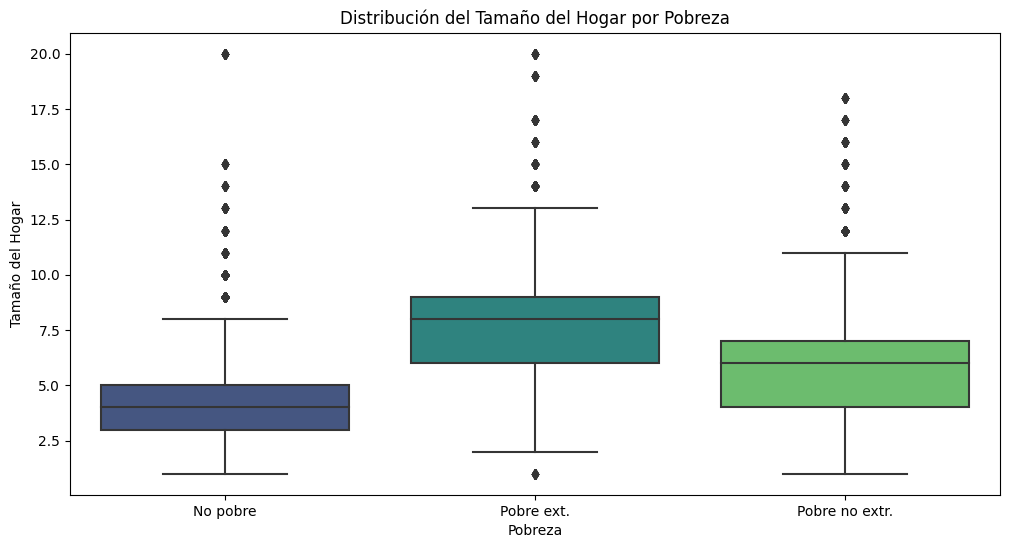

In [30]:
# Boxplot para Pobreza por Tamaño del Hogar
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pobreza', y='Tamano_hogar', data=df2_nuevo, palette='viridis')
plt.title('Distribución del Tamaño del Hogar por Pobreza')
plt.xlabel('Pobreza')
plt.ylabel('Tamaño del Hogar')
plt.show()


### Parte No.2

*Preparacion de datos*

In [31]:
# Fusionar los conjuntos de datos en función de múltiples columnas
df = pd.merge(df2_nuevo, df1_nuevo, on=['Region', 'Depto', 'Area','Pobreza','Tamano_hogar'])
print(df)


                   Region      Depto    Area         Pobreza  Tamano_hogar  \
0        I. METROPOLITANA  Guatemala  Urbana        No pobre           3.0   
1        I. METROPOLITANA  Guatemala  Urbana        No pobre           3.0   
2        I. METROPOLITANA  Guatemala  Urbana        No pobre           3.0   
3        I. METROPOLITANA  Guatemala  Urbana        No pobre           3.0   
4        I. METROPOLITANA  Guatemala  Urbana        No pobre           3.0   
...                   ...        ...     ...             ...           ...   
1271923       VIII. PETEN      Petén   Rural  Pobre no extr.          15.0   
1271924       VIII. PETEN      Petén   Rural  Pobre no extr.          15.0   
1271925       VIII. PETEN      Petén   Rural  Pobre no extr.          15.0   
1271926       VIII. PETEN      Petén   Rural  Pobre no extr.          15.0   
1271927       VIII. PETEN      Petén   Rural  Pobre no extr.          15.0   

           Sexo  Edad      Estado_civil Cocinan  No.Hogares  No

In [32]:
# Convertir las columnas a float
categorical_columns = ['Region', 'Depto', 'Area', 'Pobreza', 'Sexo', 'Estado_civil','Cocinan', 'Material_exterior', 'Material_techo', 'Material_piso', 'Servicio_telefono', 'Agua', 'Electricidad', 'Extraccion_Basura', 'Mes_enc']

df_nuevo= df.copy()
df_nuevo[categorical_columns] = df_nuevo[categorical_columns].apply(lambda x: x.cat.codes.astype('float64'))

# Verificar el resultado
print(df2_nuevo_corr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54822 entries, 0 to 54821
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        54822 non-null  float64
 1   Depto         54822 non-null  float64
 2   Area          54822 non-null  float64
 3   Pobreza       54822 non-null  float64
 4   Tamano_hogar  54822 non-null  float64
 5   Sexo          54822 non-null  float64
 6   Edad          54819 non-null  float64
 7   Estado_civil  54822 non-null  float64
dtypes: float64(8)
memory usage: 3.3 MB
None


In [33]:
# Seleccionar las características (variables predictoras) y la variable objetivo
X = df_nuevo[['Tamano_hogar', 'No.habitantes','Region', 'Depto', 'Area', 'Sexo', 'Estado_civil','Cocinan', 'Material_exterior', 'Material_techo', 'Material_piso', 'Servicio_telefono', 'Agua', 'Electricidad', 'Extraccion_Basura']]
y = df_nuevo['Pobreza']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*Construccion del modelo*

In [34]:
# Inicializar el clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)


*Evaluacion del modelo*

In [35]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Mostrar informe de clasificación
print(classification_report(y_test, y_pred))


Accuracy: 0.93
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    160097
         1.0       0.90      0.86      0.88     23598
         2.0       0.88      0.86      0.87     70691

    accuracy                           0.93    254386
   macro avg       0.91      0.90      0.90    254386
weighted avg       0.93      0.93      0.93    254386



*Optimizacion & ajustes*

In [36]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    rf_classifier, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1
)

# Ejecutar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por la búsqueda aleatoria
best_params = random_search.best_params_

# Realizar predicciones en el conjunto de prueba utilizando el modelo con los mejores hiperparámetros
y_pred = random_search.predict(X_test)

# Evaluar el rendimiento del modelo ajustado
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo ajustado - Accuracy: {accuracy:.2f}')

# Mostrar informe de clasificación para el modelo ajustado
print("Informe de clasificación para el modelo ajustado:")
print(classification_report(y_test, y_pred))

Rendimiento del modelo ajustado - Accuracy: 0.93
Informe de clasificación para el modelo ajustado:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    160097
         1.0       0.90      0.86      0.88     23598
         2.0       0.88      0.86      0.87     70691

    accuracy                           0.93    254386
   macro avg       0.91      0.90      0.90    254386
weighted avg       0.93      0.93      0.93    254386



### Parte No.3

Como grupo consideeramos  que este laboratorio fue una forma de aplicar todo lo visto a lo largo del curso puesto a que se nos permitio poder realizar un analisis del dataset algo exahustiva viendo que variables valian la pena conservar y cuales no con la finalidad de unicamente trabajar con aquellos valore que aporten algo de valor a lo que se desea realizar. Ahora bien, en cuanto a dificultades podemos mencionar  la elección del modelo fue algo que nos costo un poco pues en un inicio no sabiamos que podiamos realizar, pero luego de investigar un poco y apoyarnos de Chatgpt logramos seleccionar un modelo el cual consideramos que es adecuado para el conjunto de datos puesto a que nos permitio realizar predicciones de pobreza en base a los parametros ingresados. 

En cuanto a las posibles aplicaciones de este laboratorio se puede aplicar para analizar patrones en interacciones pasadas del cliente, evaluando datos de redes sociales, historias clínicas o encuestas. Complementariamente, el modelado con ChatGPT puede automatizar respuestas a clientes, realizar análisis de sentimientos en redes sociales, ofrecer asesoramiento financiero, proporcionar soporte técnico y mejorar la interacción en áreas como la educación en línea. Estas aplicaciones combinadas permiten la creación de soluciones inteligentes y personalizadas en diversos campos, mejorando la eficiencia y la experiencia del usuario.

En cuanto a lecciones aprendidas podemos decir que realizar diferentes modelos de pruebas, realizar un analisis de posibles datasets consideramos que son de gran aprendizaje ya que nos permiten utilizar nuestro criterio propio para asi desafiarnos a ver que es lo que se puede llegar a realizar con un conjunto de datos, como sacarle provecho a los mismos e implementar todo lo que se ha aprendido a lo largo del curso. 